<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Bullet_Cluster_Thixotropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

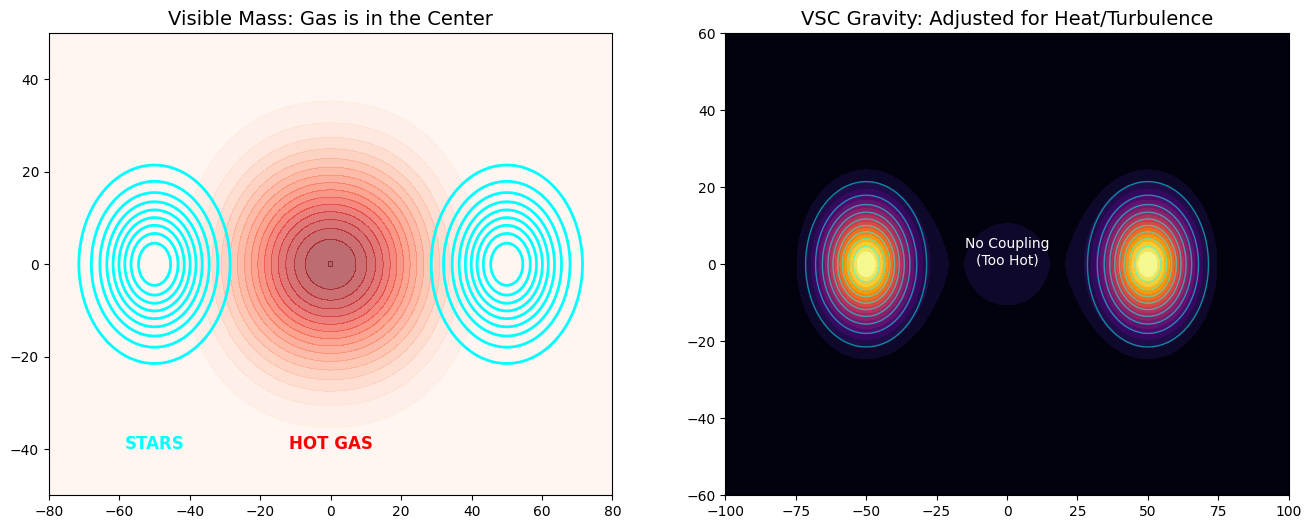

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP ---
x = np.linspace(-100, 100, 200)
y = np.linspace(-60, 60, 120)
X, Y = np.meshgrid(x, y)

def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

# --- 2. THE PLAYERS ---
# Stars (Low Mass, High Velocity, COLD/LAMINAR)
star_mass = 1.0
rho_stars = star_mass * (gaussian(X, Y, -50, 0, 10) + gaussian(X, Y, 50, 0, 10))

# Gas (High Mass, Stopped, HOT/TURBULENT)
gas_mass = 8.0
rho_gas = gas_mass * (gaussian(X, Y, -10, 0, 15) + gaussian(X, Y, 10, 0, 15))

# --- 3. THE PHYSICS (Your "Heat Excitation" Logic) ---

# A. Coherent Shear (The Stars)
# They are moving fast (Velocity Boost) and orderly.
velocity_boost = 10.0
star_shear_contribution = rho_stars * velocity_boost

# B. Turbulent Shear (The Gas)
# The gas is massive, but it is "excited" by heat.
# In fluid dynamics, turbulence breaks viscosity.
# We apply a "Thixotropic Penalty" to the gas.
heat_penalty = 20.0 # The "Excitation Factor"
gas_shear_contribution = rho_gas / heat_penalty

# Total Effective Shear Field
shear_field_corrected = star_shear_contribution + gas_shear_contribution

# --- 4. VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PLOT 1: The Mass (Visible Matter)
# Shows the Gas is in the middle (Red)
axes[0].contourf(X, Y, rho_gas, levels=20, cmap='Reds', alpha=0.6)
axes[0].contour(X, Y, rho_stars, levels=10, colors='cyan', linewidths=2)
axes[0].set_title("Visible Mass: Gas is in the Center", fontsize=14)
axes[0].text(0, -40, "HOT GAS", color='red', fontsize=12, ha='center', fontweight='bold')
axes[0].text(-50, -40, "STARS", color='cyan', fontsize=12, ha='center', fontweight='bold')
axes[0].set_xlim(-80, 80); axes[0].set_ylim(-50, 50)

# PLOT 2: The Gravity Prediction (With Heat Penalty)
# Does the gravity move to the stars?
cf = axes[1].contourf(X, Y, shear_field_corrected, levels=20, cmap='inferno')
axes[1].contour(X, Y, rho_stars, levels=10, colors='cyan', linewidths=1, alpha=0.5)
axes[1].set_title("VSC Gravity: Adjusted for Heat/Turbulence", fontsize=14)
axes[1].text(0, 0, "No Coupling\n(Too Hot)", color='white', fontsize=10, ha='center')

plt.show()